In [1]:
import numpy as np
import pandas as pd
import sys,glob,os

import matplotlib.pyplot as plt
import matplotlib

sys.path.append(sys.path[0] + '/../MeasureMSP')

from imp import reload
import platereaderclass as prc; reload(prc);
import plateimageclass as pic; reload(pic);
import plates_EstimateMSP as eMSP; reload(eMSP);

In [2]:
all_datafiles = glob.glob('../ExperimentalData/Change???/*.xlsx')
alldata = prc.PlateReaderData(infiles = all_datafiles, ForceEqualDesignSpacing = True)
global_threshold = alldata.threshold
print(global_threshold)

0.14074726961987657


In [3]:
def ReadDesignAssignment(filename):
    f = open(filename,'r')
    ret = dict()
    for line in f.readlines():
        v = line.split()
        ret[v[0]] = list(int(x) for x in v[1:])
    return ret

datafiles_cEPS = glob.glob('../ExperimentalData/ChangeEPS/*.xlsx')
designassignment_cEPS = ReadDesignAssignment('../ExperimentalData/ChangeEPS/design_assignment.txt')

print(datafiles_cEPS)
print(designassignment_cEPS)

['../ExperimentalData/ChangeEPS/ChangeEPS_WT.xlsx', '../ExperimentalData/ChangeEPS/ChangeEPS_Triple.xlsx', '../ExperimentalData/ChangeEPS/ChangeEPS_G238S.xlsx', '../ExperimentalData/ChangeEPS/ChangeEPS_E104KG238S.xlsx', '../ExperimentalData/ChangeEPS/ChangeEPS_TEM1.xlsx']
{'ChangeEPS_WT.xlsx': [0, 1, 2], 'ChangeEPS_TEM1.xlsx': [0, 0, 1, 1, 2, 2], 'ChangeEPS_E104KG238S.xlsx': [0, 0, 1, 1, 2, 2], 'ChangeEPS_G238S.xlsx': [0, 0, 1, 1, 2, 2], 'ChangeEPS_Triple.xlsx': [0, 1, 2]}


/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

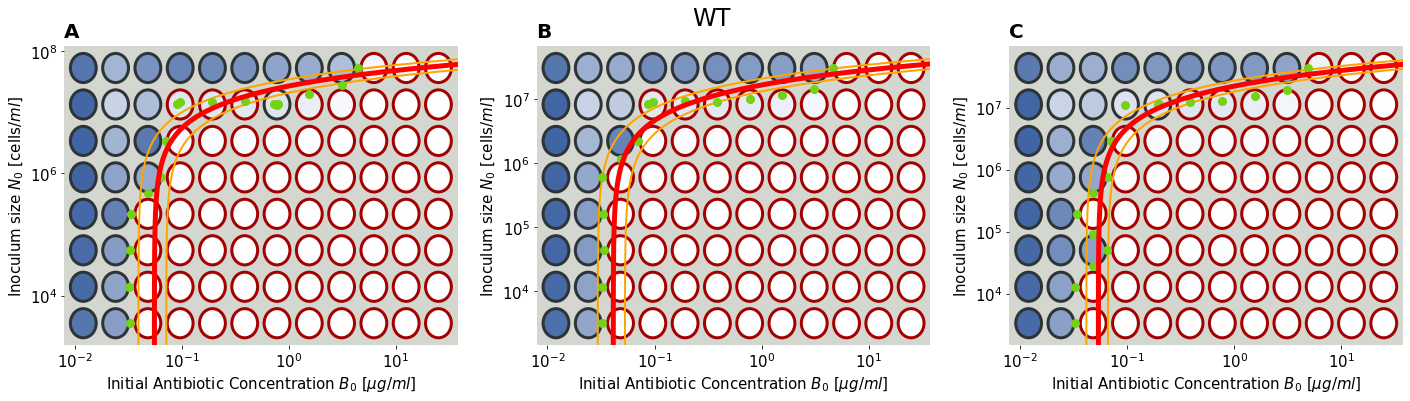

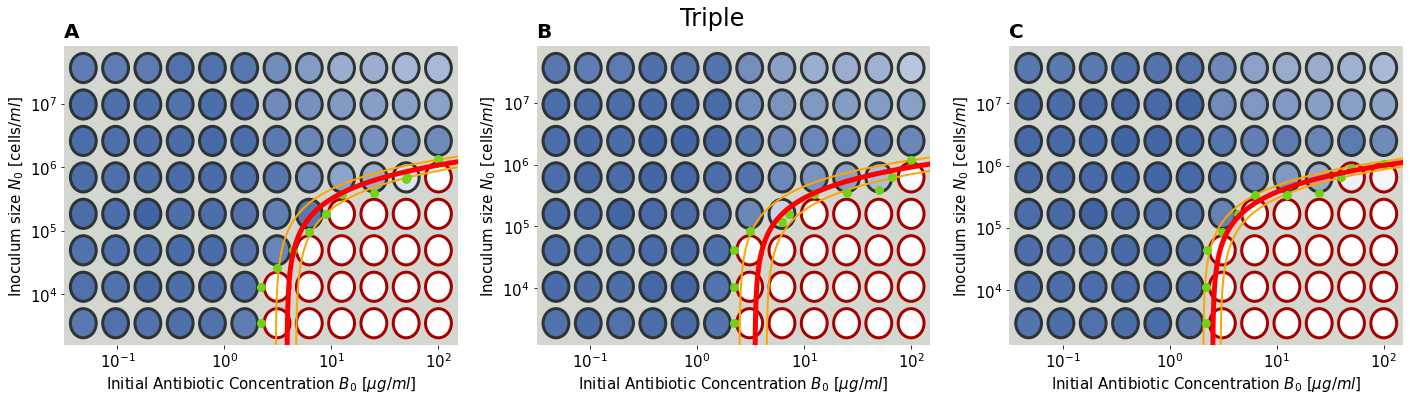

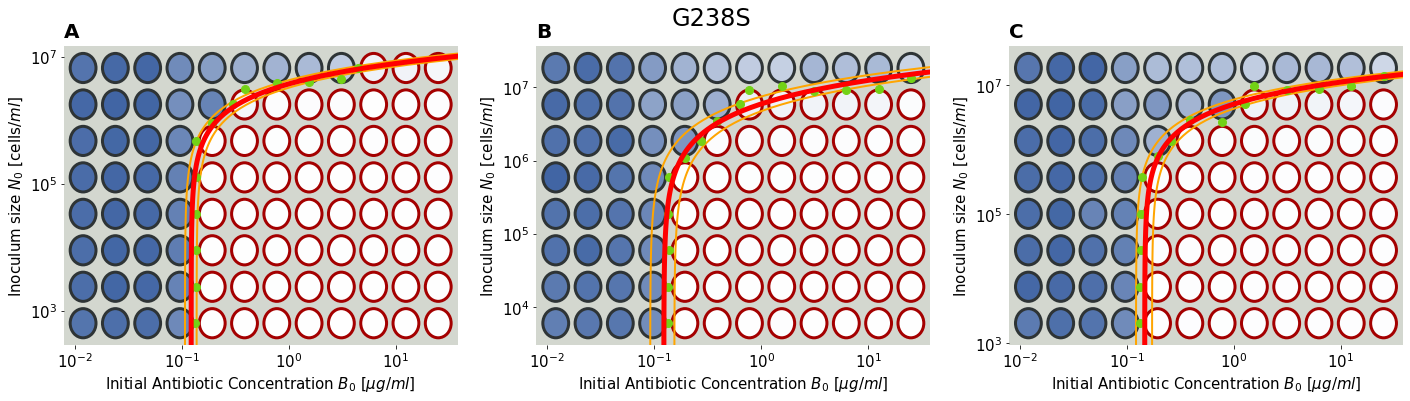

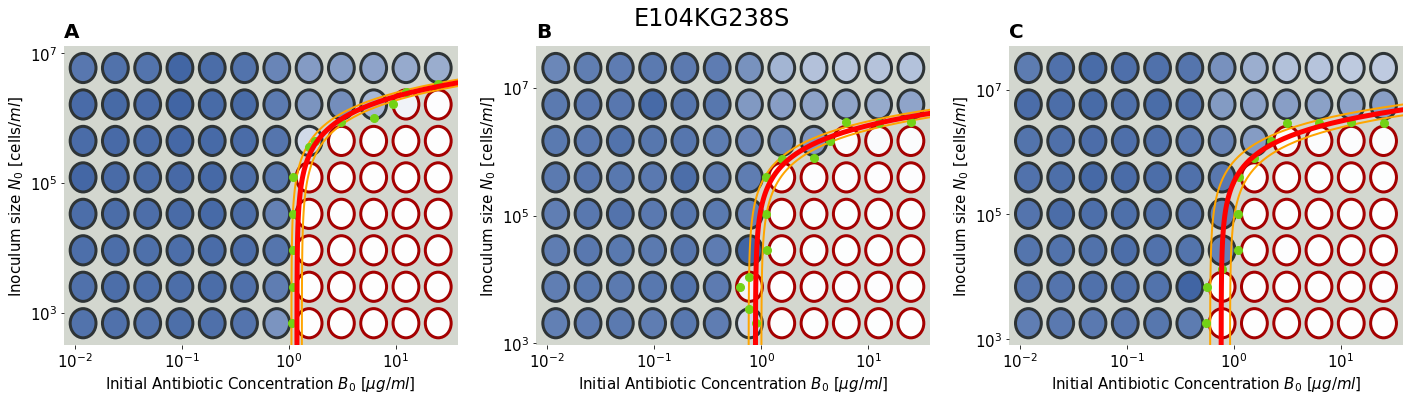

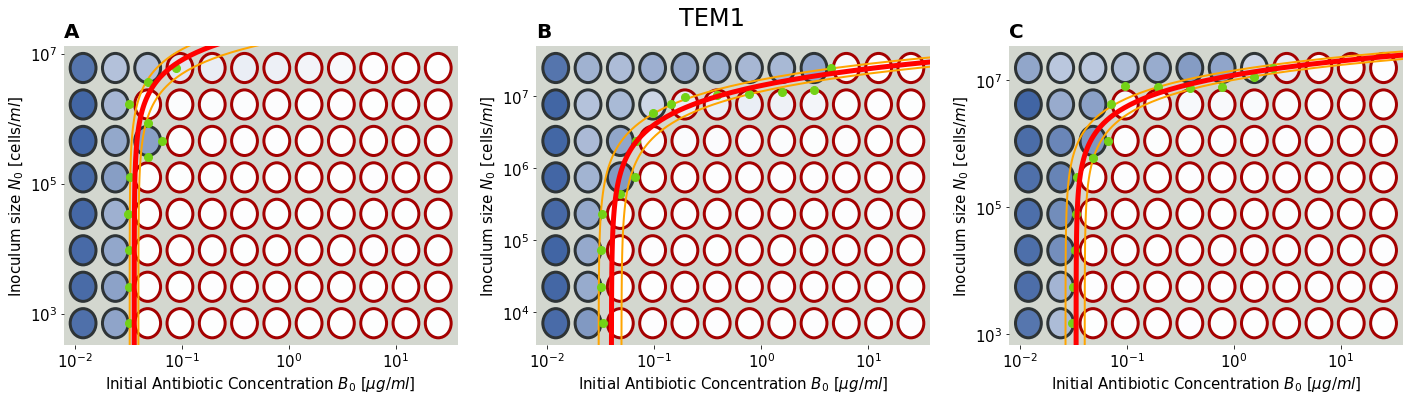

In [4]:
for filename in datafiles_cEPS:
    basename = os.path.basename(filename)
    
    data = prc.PlateReaderData(infiles = [filename],
                               DesignAssignment = designassignment_cEPS[basename],
                               ForceOrientation = True,
                               ForceEqualDesignSpacing = True,
                               ThresholdLog = True)
    
    platecount = len([t for t in data.titles if not '-IPTG' in t])
    fig,ax = plt.subplots(1,platecount,figsize = (8 * platecount,5.5))
    i = 0

    for j,(fn, title, platedata, designID) in enumerate(data):
        if not '-IPTG' in title:
            design      = data.get_design(designid = designID)
            plate       = pic.PlateImage(platedata, design, fig = fig, ax = ax[i], panelID = chr(65+i), Threshold = global_threshold)
            transitions = data.compute_growth_nogrowth_transition(dataID = j, threshold = global_threshold)
            fitdata     = eMSP.estimate_Tau_sMIC_nonlinfit_AsFuncLogN(transitions)

            plate.plot_curve(popsize = transitions.T[1], abconc = transitions.T[0], lw = 0, marker = 'o', markersize = 8, c = '#73d216', zorder = 2)
            
            plate.plot_MSIcurve(tau = fitdata['BlN_tau'], mueff = fitdata['BlN_sMIC'], lw = 5, c = 'red', zorder = 3)
            plate.plot_MSIcurve(tau = fitdata['BlN_tau'] + fitdata['BlN_tau_stddev'], mueff = fitdata['BlN_sMIC'] - fitdata['BlN_sMIC_stddev'], lw = 2, c = 'orange', zorder = 1)
            plate.plot_MSIcurve(tau = fitdata['BlN_tau'] - fitdata['BlN_tau_stddev'], mueff = fitdata['BlN_sMIC'] + fitdata['BlN_sMIC_stddev'], lw = 2, c = 'orange', zorder = 1)
            
            i += 1
            
    fig.suptitle(basename.split('.')[0].split('_')[1], fontsize = 24)#, weight = 'bold')
    fig.savefig(basename.replace('xlsx', 'pdf'))

In [5]:
datafiles_cRHO = glob.glob('../ExperimentalData/ChangeRHO/*.xlsx')
designassignment_cRHO = ReadDesignAssignment('../ExperimentalData/ChangeRHO/design_assignment.txt')

print(datafiles_cRHO)
print(designassignment_cRHO)

['../ExperimentalData/ChangeRHO/ChangeRHO_Triple.xlsx', '../ExperimentalData/ChangeRHO/ChangeRHO_G238S.xlsx']
{'ChangeRHO_G238S.xlsx': [0, 0, 0, 0, 0, 0, 0, 0], 'ChangeRHO_Triple.xlsx': [0, 0, 1, 1, 1, 1, 0, 0]}


/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

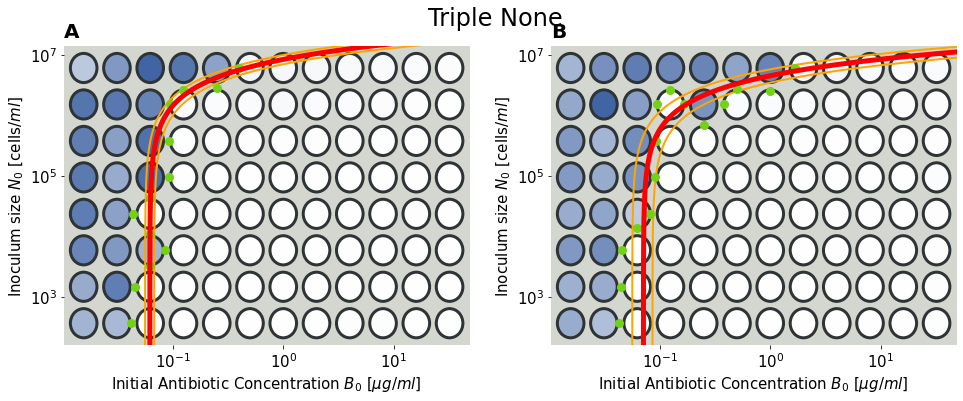

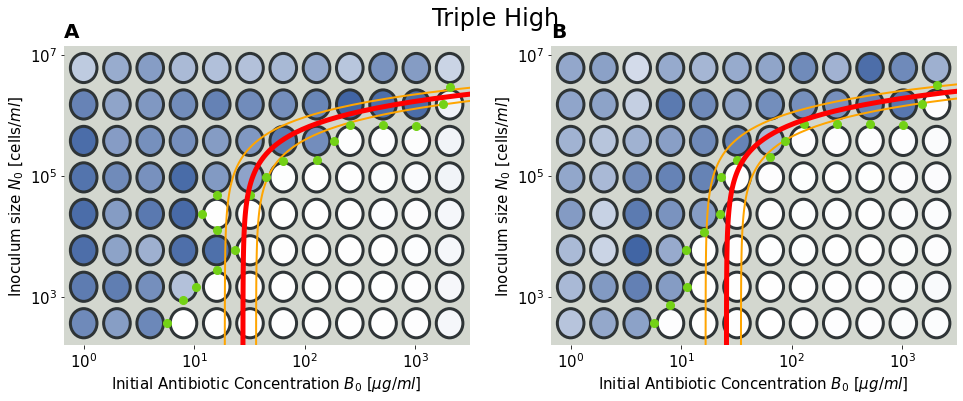

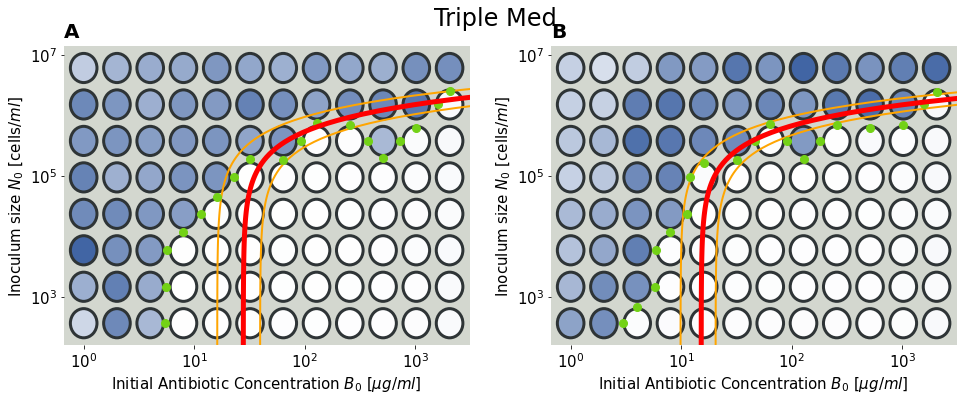

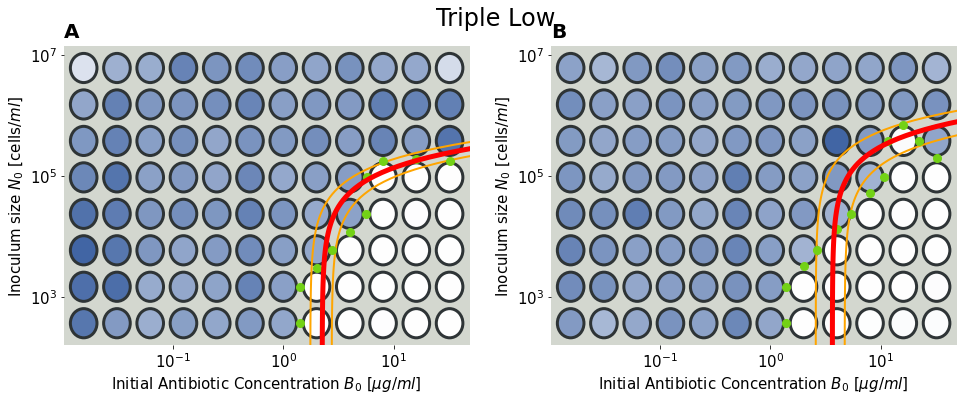

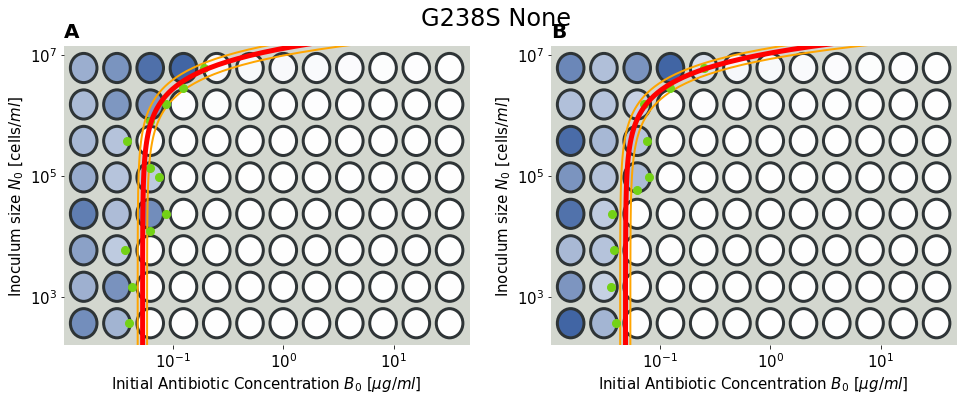

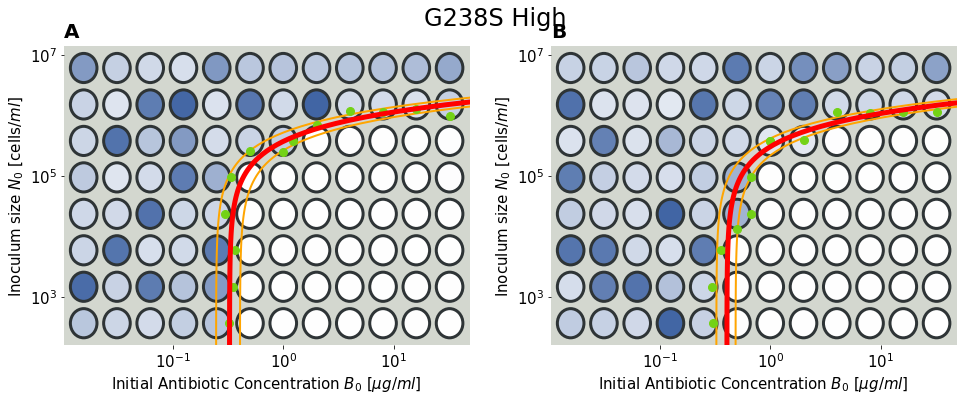

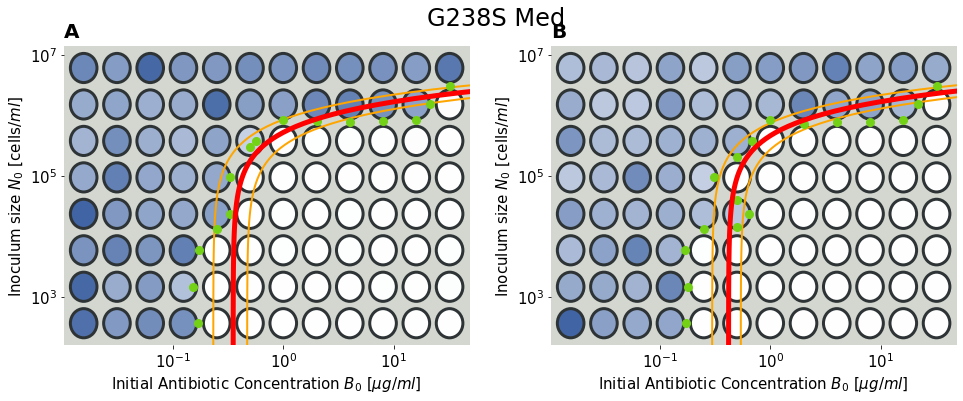

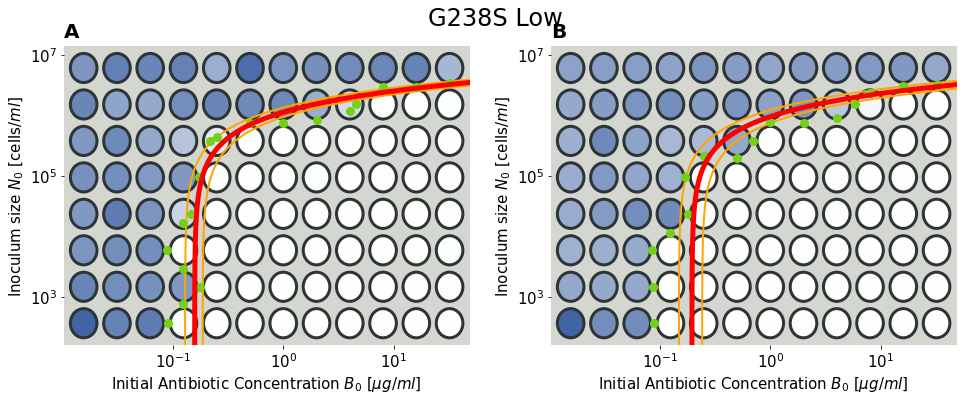

In [6]:
for filename in datafiles_cRHO:
    basename = os.path.basename(filename)
    
    data = prc.PlateReaderData(infiles = [filename],
                               DesignAssignment = designassignment_cRHO[basename],
                               ForceOrientation = True,
                               ForceEqualDesignSpacing = True,
                               ThresholdLog = True)
    
    for j,(fn, title, platedata, designID) in enumerate(data):
        if j%2 == 0:
            fig,ax = plt.subplots(1,2, figsize = (16,5.5))
        
        design = data.get_design(designid = designID)
        plate = pic.PlateImage(platedata, design, fig = fig, ax = ax[j%2], threshold = global_threshold, panelID = chr(65  + j%2))
        transitions = data.compute_growth_nogrowth_transition(dataID = j, threshold = global_threshold)
        fitdata     = eMSP.estimate_Tau_sMIC_nonlinfit_AsFuncLogN(transitions)

        plate.plot_curve(popsize = transitions.T[1], abconc = transitions.T[0], lw = 0, marker = 'o', markersize = 8, c = '#73d216', zorder = 2)

        plate.plot_MSIcurve(tau = fitdata['BlN_tau'], mueff = fitdata['BlN_sMIC'], lw = 5, c = 'red', zorder = 3)
        plate.plot_MSIcurve(tau = fitdata['BlN_tau'] + fitdata['BlN_tau_stddev'], mueff = fitdata['BlN_sMIC'] - fitdata['BlN_sMIC_stddev'], lw = 2, c = 'orange', zorder = 1)
        plate.plot_MSIcurve(tau = fitdata['BlN_tau'] - fitdata['BlN_tau_stddev'], mueff = fitdata['BlN_sMIC'] + fitdata['BlN_sMIC_stddev'], lw = 2, c = 'orange', zorder = 1)
        
        
        
        if j%2 == 1:
            fig.suptitle(title[:-2], fontsize = 24)
            fig.savefig('ChangeRHO_{}.pdf'.format(title[:-2].replace(' ','_')))